### Import Lib

In [3]:
import numpy as np
import pandas as pd #库
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Load data

In [4]:
df=pd.read_csv('dataset.csv') #定义df=data frame 调用pandas库里的函数
print(df.head(5)) #打印前五行看一下是不是这个数据集
print(df.info())#查看后发现没有缺失值
print(df.nunique())#除了前两列，其余每列都有重复值
print(df.describe())#查看数据的描述性信息

   Unnamed: 0      date  max_temp  min_temp  avg_temp  humi  rain        power
0           0  20120101      19.5      12.1      15.8    63   0.0  306595.5860
1           1  20120102      20.0      13.0      16.0    59   0.0  433730.0114
2           2  20120103      18.7      14.2      15.8    72   0.0  546110.0255
3           3  20120104      14.9       9.3      10.9    62   0.0  581355.2112
4           4  20120105       9.2       5.1       6.9    78   2.9  591234.7981
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1105 non-null   int64  
 1   date        1105 non-null   int64  
 2   max_temp    1105 non-null   float64
 3   min_temp    1105 non-null   float64
 4   avg_temp    1105 non-null   float64
 5   humi        1105 non-null   int64  
 6   rain        1104 non-null   float64
 7   power       1105 non-null   float64
dtypes: fl

In [5]:
x_colums=['date', 'max_temp', 'min_temp', 'avg_temp', 'humi', 'rain']
y_colums=['power']
all_colums=['date', 'max_temp', 'min_temp', 'avg_temp', 'humi', 'rain', 'power']

In [7]:
print(df[all_colums].nunique())
#提取重复值                     对我们的项目无需检查重复值
print(df[df.duplicated()])#结果发现无重复值

date        1105
max_temp     248
min_temp     229
avg_temp     234
humi          71
rain         216
power       1105
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, date, max_temp, min_temp, avg_temp, humi, rain, power]
Index: []


### Visualization

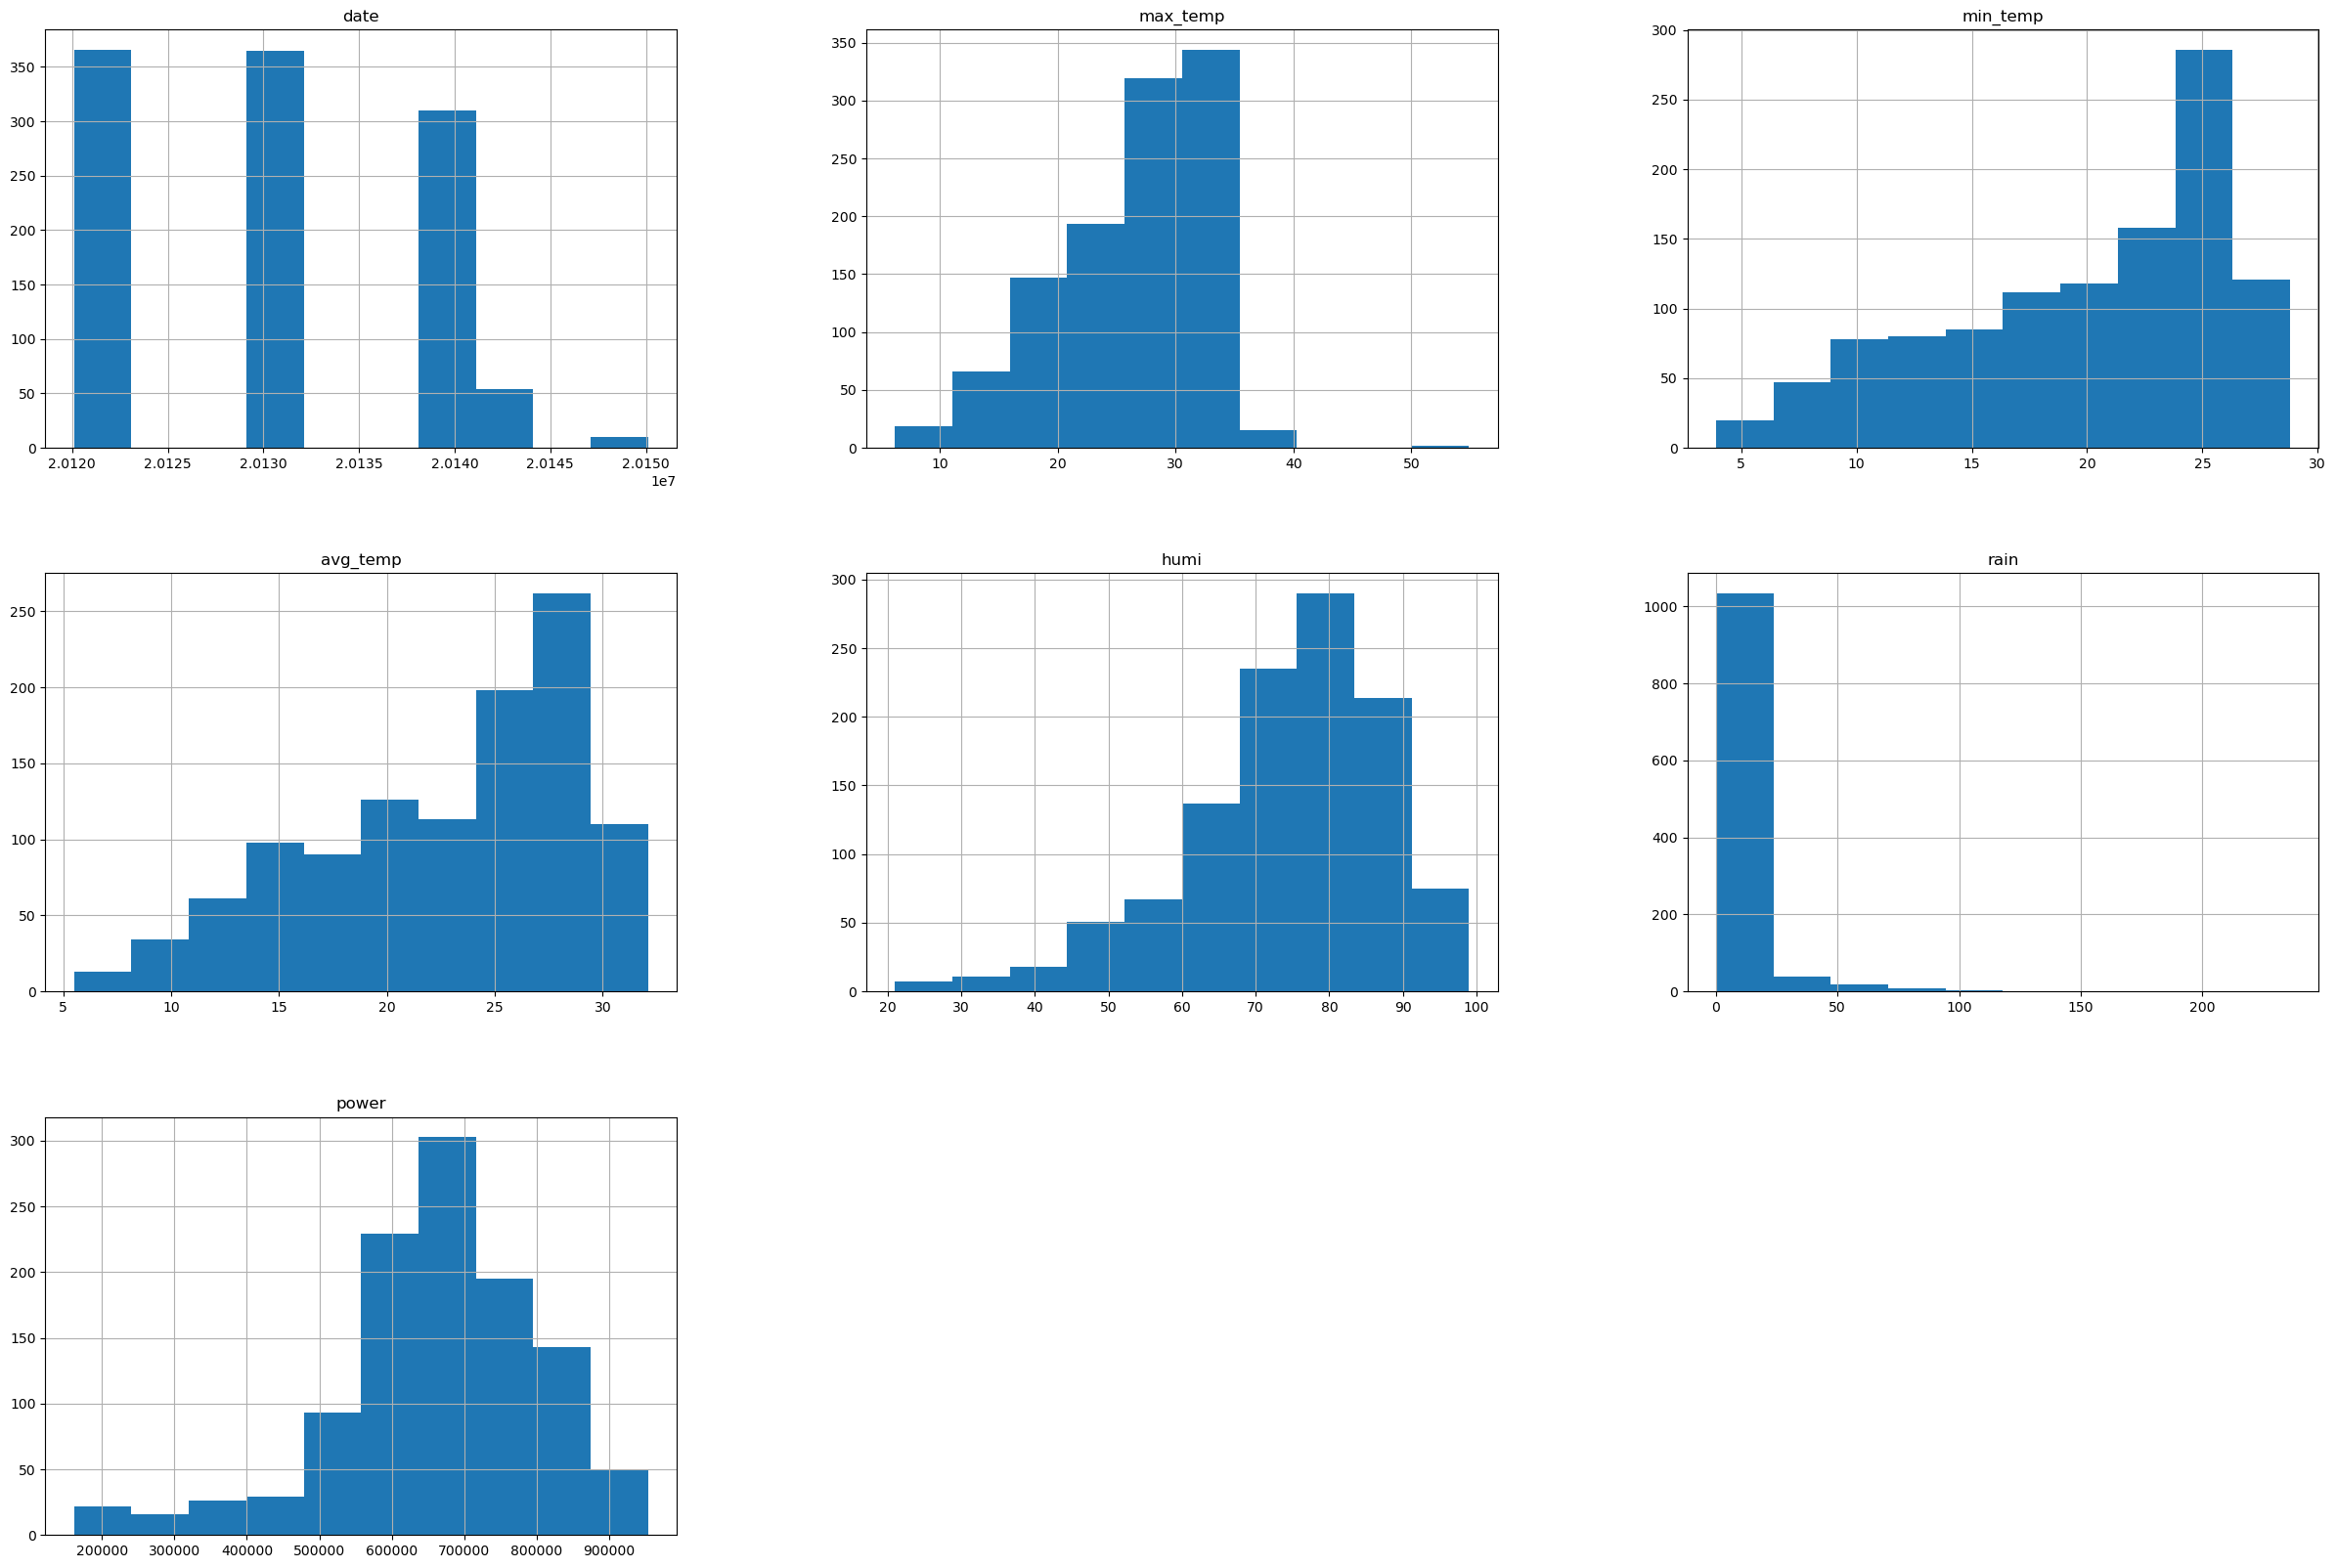

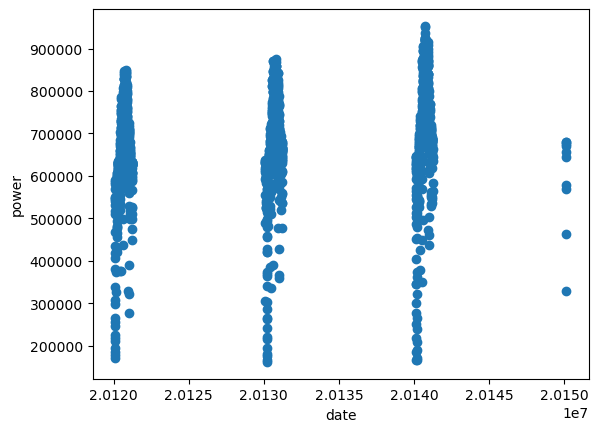

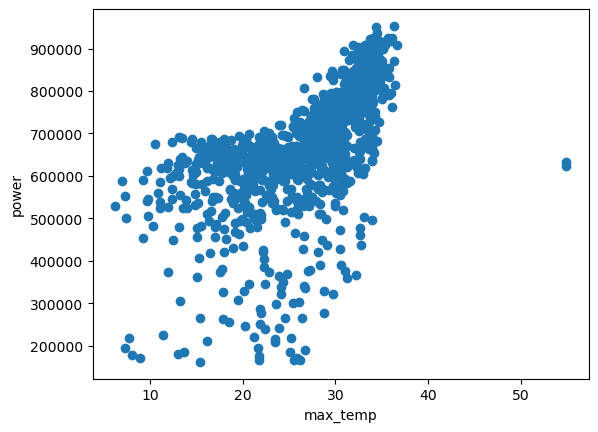

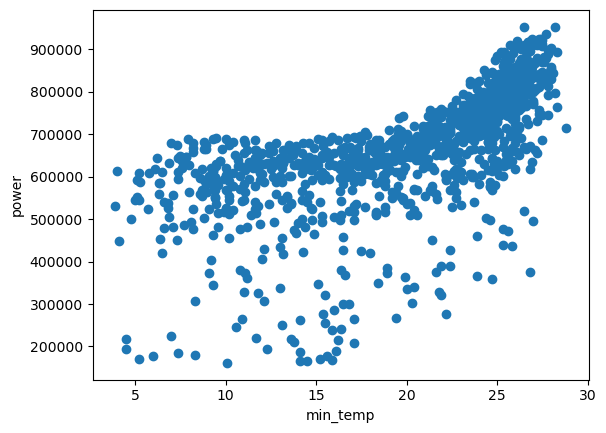

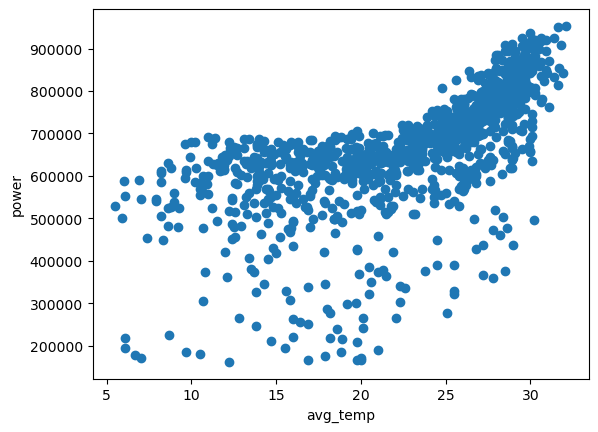

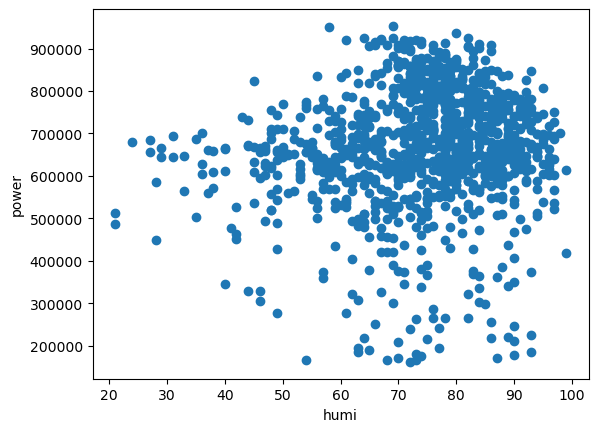

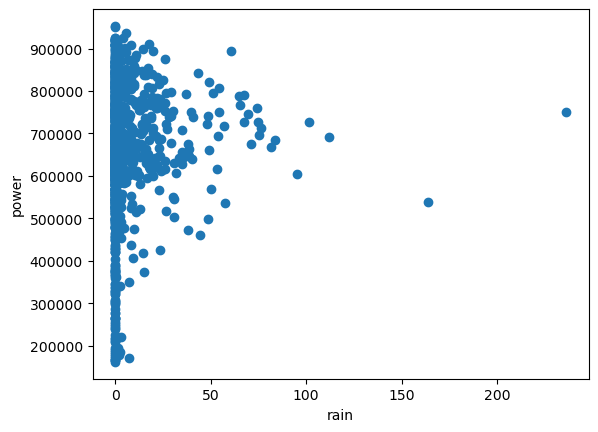

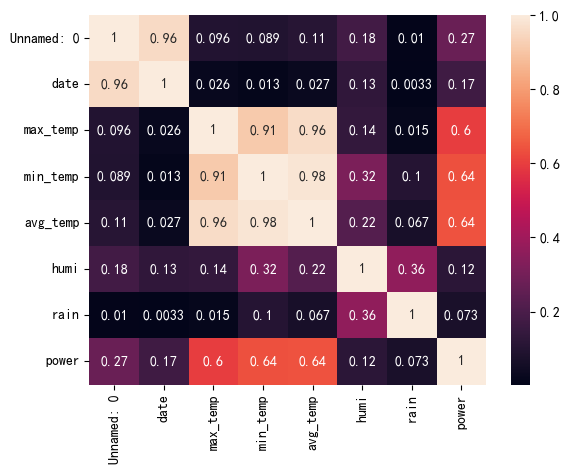

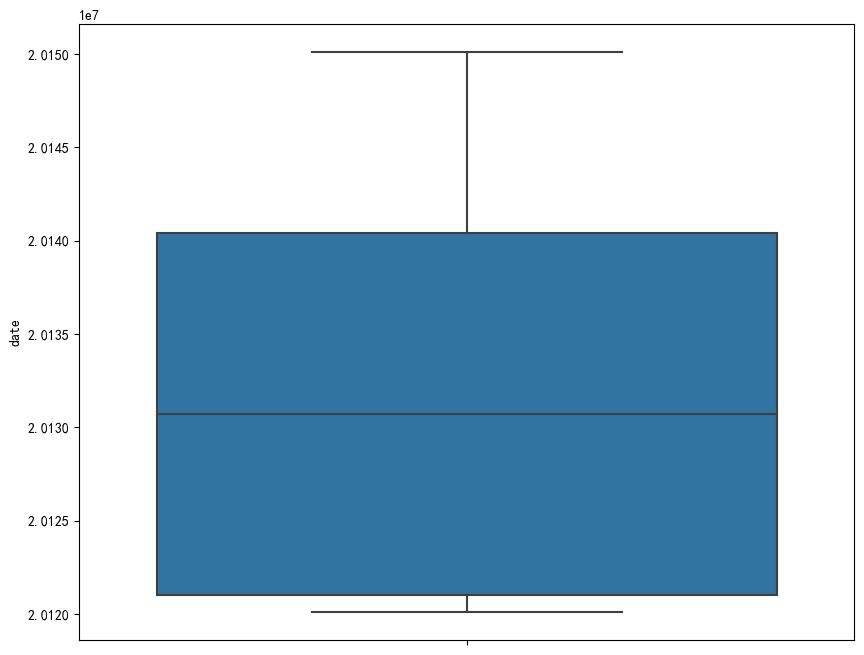

<Figure size 640x480 with 0 Axes>

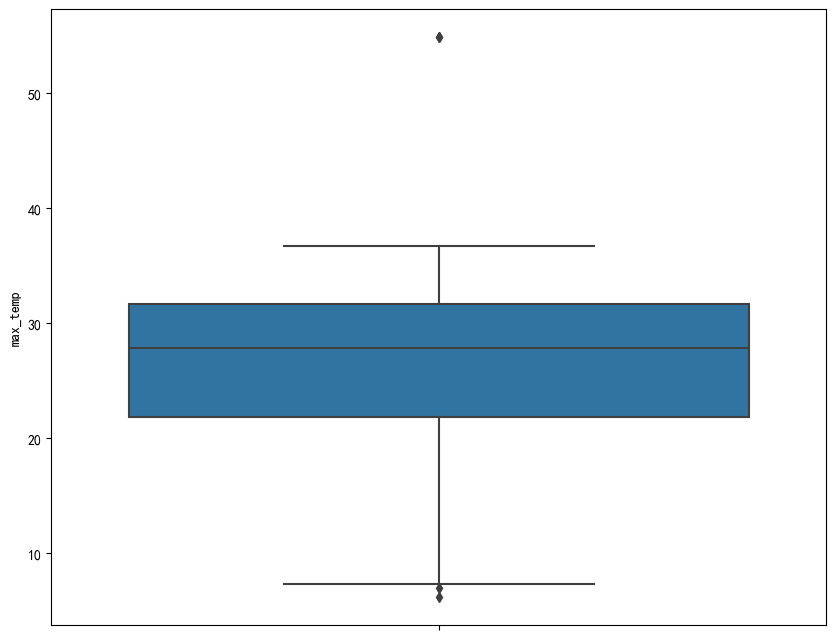

<Figure size 640x480 with 0 Axes>

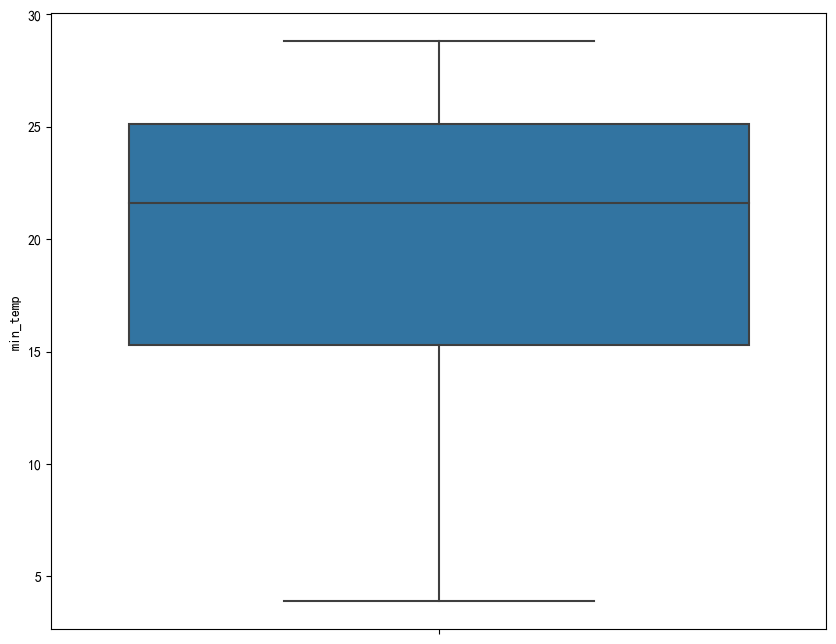

<Figure size 640x480 with 0 Axes>

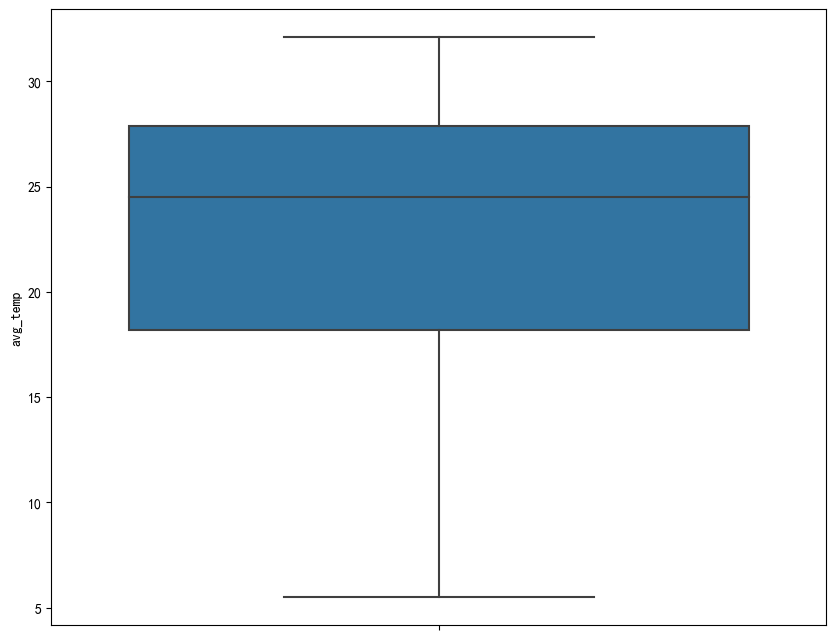

<Figure size 640x480 with 0 Axes>

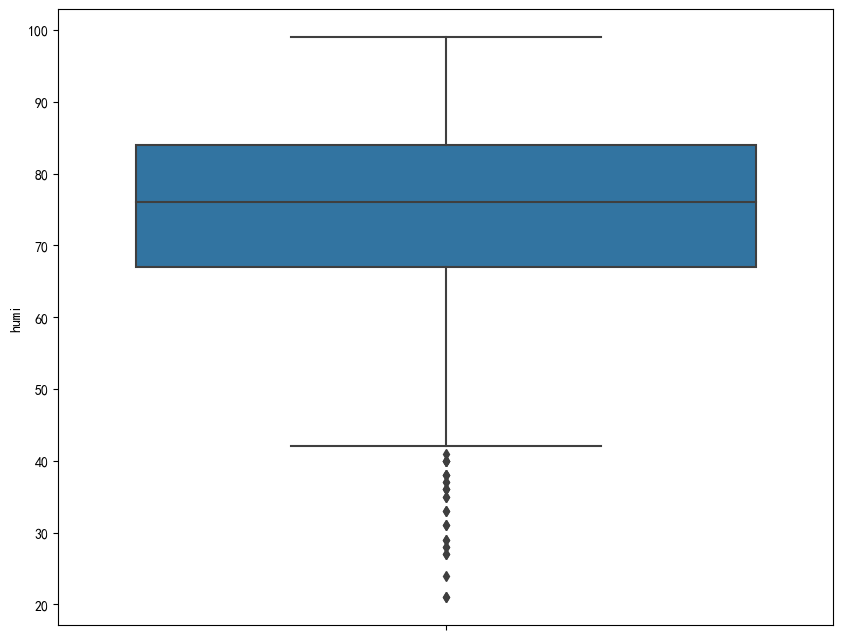

<Figure size 640x480 with 0 Axes>

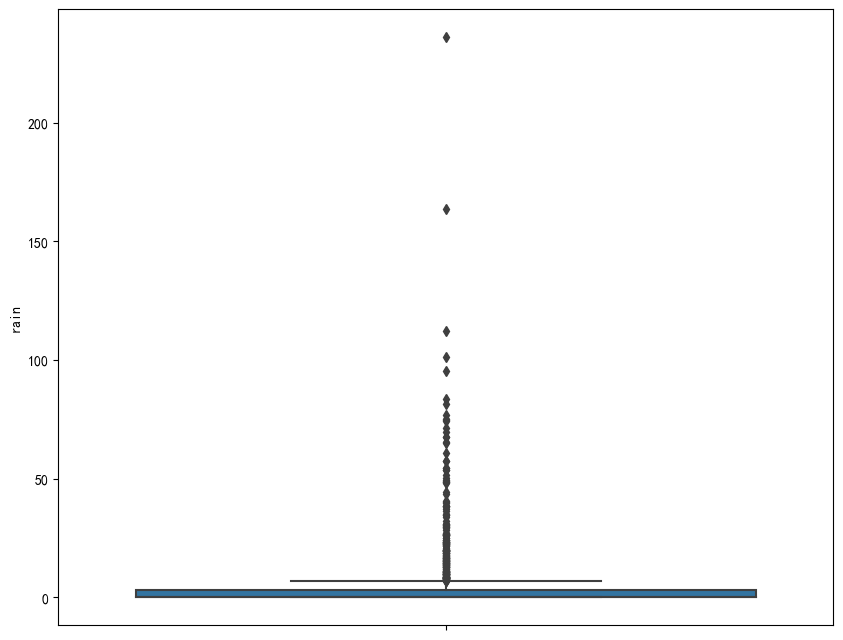

<Figure size 640x480 with 0 Axes>

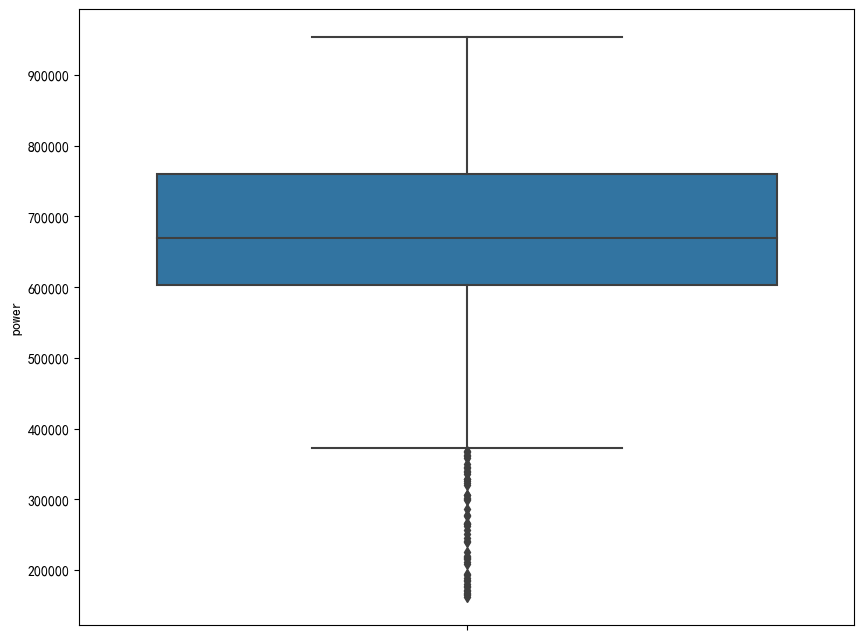

<Figure size 640x480 with 0 Axes>

In [6]:
#数据初步可视化
#绘制直方图
def hist(df):
    df.hist(figsize=(30,20))
    plt.show()
    plt.savefig('a.png')
hist(df[all_colums])
#绘制散点图
def scatter(df):
    for i in all_colums[:6]:
         plt.scatter(df[i],df['power'])
         plt.xlabel(i)
         plt.ylabel('power')
         plt.show()
scatter(df)
#相关系数查看特征与特征，特征与响应的线性关系
def corr_view():
    data_corr=df.corr()
    data_corr=data_corr.abs()  #绝对值
    sns.heatmap(data_corr,annot=True) #热力图
    plt.savefig('b.png')
corr_view()
#异常值可视化
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
for i in all_colums:
    f,ax=plt.subplots(figsize=(10,8))
    sns.boxplot(y=i,data=df,ax=ax)
    plt.show()
    plt.savefig('c.png', dpi=500)
#经发现，'hum','windspeed','casual'这三列中有异常值

### Pre-processing

In [7]:
#异常值处理
# 通过Z-Score方法判断异常值，阙值设置为正负2
# 复制一个用来存储Z-score得分的数据框,常用于原始对象和复制对象同时进行操作的场景
df_zscore = df.copy()    
for col in all_colums: 
    df_col = df[col]  
    z_score = (df_col - df_col.mean()) / df_col.std()  # 计算每列的Z-score得分
    df_zscore[col] = z_score.abs() > 2  # 判断Z-score得分绝对值是否大于2，大于2即为异常值
print(df_zscore)#显示为True的表示为异常值
# 剔除异常值所在的行
print(df[df_zscore['max_temp'] == False])
print(df[df_zscore['min_temp'] == False])
print(df[df_zscore['avg_temp'] == False])#最终得到679x7的数列

      Unnamed: 0   date  max_temp  min_temp  avg_temp   humi   rain  power
0              0  False     False     False     False  False  False   True
1              1  False     False     False     False  False  False  False
2              2  False     False     False     False  False  False  False
3              3  False     False     False     False  False  False  False
4              4  False      True      True      True  False  False  False
...          ...    ...       ...       ...       ...    ...    ...    ...
1100        1100   True     False     False     False  False  False  False
1101        1101   True     False     False     False  False  False  False
1102        1102   True     False     False     False  False  False  False
1103        1103   True     False     False     False  False  False  False
1104        1104   True     False     False     False  False  False  False

[1105 rows x 8 columns]
      Unnamed: 0      date  max_temp  min_temp  avg_temp  humi  rain  \
0  

In [8]:
#将清洗后的数据写入新的文件,命名为new_df
df=df[df_zscore['max_temp'] == False]
df=df[df_zscore['min_temp'] == False]
new_df=df[df_zscore['avg_temp'] == False]
new_df.to_csv('clear_dataset.csv')

C:\Users\26673\AppData\Local\Temp\ipykernel_19604\1724730373.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[df_zscore['min_temp'] == False]
C:\Users\26673\AppData\Local\Temp\ipykernel_19604\1724730373.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df=df[df_zscore['avg_temp'] == False]


In [9]:
final_df=new_df.loc[:,['max_temp', 'min_temp', 'avg_temp', 'power']]
final_df.to_csv('final_dataset.csv')

### Normalization

In [10]:
#归一化;归一化通常有两种：最值归一化和均值方差归一化，这里采用最值归一化
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# scaler=MinMaxScaler(feature_range=(0, 1)).fit(final_df)
# final_df_scaler=scaler.fit_transform(final_df)
# print(final_df_scaler)
# print(final_df_scaler.shape)
#(679, 3)
dataset = read_csv('final_dataset.csv', header=0, index_col=0)
values = dataset.values
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1)).fit(values) #最大最小值归一化
final_df_scaler = scaler.fit_transform(values) 

print(final_df_scaler)
print(final_df_scaler.shape)

[[0.24890828 0.21226421 0.24537042 0.18308665]
 [0.27074236 0.25471702 0.25462964 0.34363484]
 [0.21397382 0.31132075 0.24537042 0.48555082]
 ...
 [0.1790393  0.1226415  0.15740737 0.64782655]
 [0.15720522 0.16509435 0.16203704 0.6549609 ]
 [0.26637554 0.20754722 0.22685185 0.62558055]]
(1045, 4)


### Data Partition

In [11]:
#对新文件训练集与测试集划分
from sklearn.model_selection import train_test_split
#random_state:设置随机种子，保证每次运行生成相同的随机数
train_set,test_set = train_test_split(final_df_scaler, test_size=0.2, random_state=42)
 
x_train=train_set[:,0:3]
y_train=train_set[:,3]
x_test=test_set[:,0:3]
y_test=test_set[:,3]
print(x_train.shape)
print(y_test.shape)
print(y_train.dtype)

(836, 3)
(209,)
float32


### Linear Model

In [11]:
#进行模型训练
#1.线性回归
from sklearn import linear_model
#from sklearn import model_selection
from sklearn.linear_model import LinearRegression
def test_LinearRegression():
    linearRegression = linear_model.LinearRegression()
    #进行训练
    linearRegression.fit(x_train, y_train)
    #通过LinearRegression的coef_属性获得权重向量,intercept_获得b的值
    print("权重向量:%s, b的值为:%.2f" % (linearRegression.coef_, linearRegression.intercept_))
    #计算出损失函数的值
    print("损失函数的值: %.2f" % np.mean((linearRegression.predict(x_test) - y_test) ** 2))
    #计算预测性能得分
    print("预测性能得分: %.2f" % linearRegression.score(x_test, y_test))
test_LinearRegression()
#权重向量:[0.26697613 0.85123791], b的值为:-0.00
#损失函数的值: 0.00
#预测性能得分: 1.00

权重向量:[-0.40220055 -0.08804566  1.14275706], b的值为:-0.02
损失函数的值: 0.49
预测性能得分: 0.36


### Support Vector Regression

In [12]:
#2.使用非线性支持向量机（SVM）进行回归预测
from sklearn.svm import SVC
from sklearn import metrics
svm_model=SVC()#SVM分类器
svm_model.fit(x_train.astype("int"),y_train.astype("int"))#注：需要将数据类型转化为int型
prediction=svm_model.predict(x_test.astype("int"))
print('准确率为：',metrics.accuracy_score(prediction, y_test.astype("int")))
#准确率为： 

准确率为： 1.0


### MLP pytorch

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [129]:
act = nn.Sigmoid()

In [131]:
act(torch.tensor(-30.123))

tensor(8.2746e-14)

In [217]:
class MLP(nn.Module):
    def __init__(self, hidden_layers=16):
        super(MLP, self).__init__()
        self.Linear1 = nn.Linear(3, 8, bias=False)
        # self.Linear2 = nn.Linear(8, 8, bias=True)
        self.Linear3 = nn.Linear(8, 1, bias=False)
        self.act = nn.Sigmoid()  # 0到1之间的非线性映射函数 赋予神经网络非线性 正则化神经网络防止梯度爆炸
        self.bn1 = nn.BatchNorm1d(8)
        self.bn2 = nn.BatchNorm1d(2)
    def forward(self, input):
        x = self.Linear1(input)
        x = self.act(x)
        x = self.bn1(x) #批正则化 shuru
        # x = self.Linear2(x)
        # x = self.act(x)
        # x = self.bn2(x)
        x = self.Linear3(x)  #输出是否要激活
        # x = 2*self.act(x)
        return x

In [218]:
model = MLP()
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(model.parameters(), lr=1e-6, momentum=0.9) #SGD梯度下降

In [222]:
train_loss = 0
batch_x, batch_y = [], []
for i in tqdm(range(18)):
    for i in range(len(x_train)):
    
        batch_x.append(x_train[i,:])
        batch_y.append([y_train[i]])
        i+=1
    
        if i%64==0:   
            data = torch.tensor(batch_x).to(torch.float32).to(device)
            label= torch.tensor(batch_y).to(torch.float32).to(device)
            # print(data)
            # print(label)
            pred = model(data).to(device)
            # print(pred)
            loss = loss_fn(pred, label)
            loss.backward()
            optim.step()
        
            train_loss += loss.detach().numpy()
            batch_x, batch_y = [], []
    
    print('train_loss:', train_loss/len(x_train))
    train_loss = 0

 22%|██████████████████▍                                                                | 4/18 [00:00<00:00, 39.08it/s]

train_loss: 0.009283092282890704
train_loss: 0.009002998043475539
train_loss: 0.008769642258660075
train_loss: 0.008571652490556525
train_loss: 0.008436539063328191
train_loss: 0.008376459649019834
train_loss: 0.008406218907764653
train_loss: 0.008508446755591762


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 45.80it/s]

train_loss: 0.008669469701616387
train_loss: 0.008883943932763698
train_loss: 0.009143035306314532
train_loss: 0.009424342136634024
train_loss: 0.009730842837876681
train_loss: 0.01004868168294715
train_loss: 0.010346304999584216
train_loss: 0.010609613152211933
train_loss: 0.010825792710746875
train_loss: 0.010987736035191842


In [223]:
y_test

array([ 0.13124237, -1.1617736 , -0.15389877, -0.32800747, -0.37598041,
        1.68494606, -1.07870934, -0.73219268,  0.36450085,  1.46672184,
       -0.59936498,  0.10405616, -0.04484797, -1.24110396,  0.32194958,
       -1.79500652,  1.22803477, -0.47296569,  0.68496335, -0.05019653,
        0.32997511, -0.63368035, -0.14202574, -0.51376855,  0.90159182,
       -0.42148392, -0.08865508,  0.40599044,  1.20237227, -0.36721635,
       -0.13687976, -0.88966513,  0.15931063,  0.28979712, -0.29295999,
       -0.38750168,  0.41567698,  0.13773146, -0.13677878, -0.4925355 ,
        0.96993561,  0.7767096 ,  0.02869314,  0.58109295, -0.97950719,
        0.49332718,  1.01421387, -0.30735468, -0.11029906, -0.14122984,
        1.39582906,  1.2135643 , -0.75750684, -0.14251397, -0.32974051,
       -0.00974355, -0.80524577, -0.94284572,  1.14262894,  1.02473528,
        0.69881016, -1.46534086,  0.3383675 ,  1.32727635,  0.41203026,
       -0.17496243, -0.04498901,  1.16987461, -0.22323566,  0.77

In [224]:
test_batch = []
for i in range(64):
    test_batch.append(x_test[i, :])

In [225]:
test_batch = torch.tensor(test_batch).to(torch.float32)

In [226]:
pred = model(torch.tensor(test_batch).to(torch.float32))

C:\Users\26673\AppData\Local\Temp\ipykernel_1272\3903771269.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(test_batch).to(torch.float32))


In [227]:
y_test[0:64]

array([ 0.13124237, -1.1617736 , -0.15389877, -0.32800747, -0.37598041,
        1.68494606, -1.07870934, -0.73219268,  0.36450085,  1.46672184,
       -0.59936498,  0.10405616, -0.04484797, -1.24110396,  0.32194958,
       -1.79500652,  1.22803477, -0.47296569,  0.68496335, -0.05019653,
        0.32997511, -0.63368035, -0.14202574, -0.51376855,  0.90159182,
       -0.42148392, -0.08865508,  0.40599044,  1.20237227, -0.36721635,
       -0.13687976, -0.88966513,  0.15931063,  0.28979712, -0.29295999,
       -0.38750168,  0.41567698,  0.13773146, -0.13677878, -0.4925355 ,
        0.96993561,  0.7767096 ,  0.02869314,  0.58109295, -0.97950719,
        0.49332718,  1.01421387, -0.30735468, -0.11029906, -0.14122984,
        1.39582906,  1.2135643 , -0.75750684, -0.14251397, -0.32974051,
       -0.00974355, -0.80524577, -0.94284572,  1.14262894,  1.02473528,
        0.69881016, -1.46534086,  0.3383675 ,  1.32727635])

In [228]:
diff = np.mean(np.abs(pred.detach().numpy()-y_test[0:64]))

In [229]:
diff

1.155358741334166

In [26]:
class FFN(nn.Module):
	def __init__(self, lr):
		super(FFN, self).__init__()
		self.model = MLP()
		self.loss  = nn.SmoothL1Loss()    
		self.optim = torch.optim.Adam(self.model(), lr = lr, weight_decay = 2e-5)
		print(time.strftime("%m-%d %H:%M:%S") + \
              " Model para number = %.2f"%(sum(param.numel() for param in self.model.parameters()) / 1024 / 1024))      
         
	def fit(self, epoch, loader):
		self.train()        
		## Update the learning rate based on the current epcoh
		index, loss = 0, 0, 0
		lr = self.optim.param_groups[0]['lr']
		for num, (data, labels) in enumerate(loader, start = 1):
			self.zero_grad()          
			pred = self.model.forward(data)
			loss = self.loss(pred, labels)         
			loss.backward()
			self.optim.step()
                
			index += len(labels)
			loss  += loss.detach().numpy()
			sys.stderr.write(time.strftime("%m-%d %H:%M:%S") + \
			" [%2d] Lr: %5f, Training: %.2f%%, "    %(epoch, lr, 100 * (num / loader.__len__())) + \
			" Loss: %.5f, \r"        %(loss/(num)))
			sys.stderr.flush()
		sys.stdout.write("\n")
		return loss/num, lr

	def eval(self, eval_list, eval_path):
		self.eval()
		files = []
		embeddings = {}
		lines = open(eval_list).read().splitlines()
		for line in lines:
			files.append(line.split()[1])
			files.append(line.split()[2])
		setfiles = list(set(files))
		setfiles.sort()

		for idx, file in tqdm.tqdm(enumerate(setfiles), total = len(setfiles)):
			x
		return EER, minDCF

	def save_parameters(self, path):
		torch.save(self.state_dict(), path)

	def load_parameters(self, path):
		self_state = self.state_dict()
		loaded_state = torch.load(path)
		for name, param in loaded_state.items():
			origname = name
			if name not in self_state:
				name = name.replace("module.", "")
				if name not in self_state:
					print("%s is not in the model."%origname)
					continue
			if self_state[name].size() != loaded_state[origname].size():
				print("Wrong parameter length: %s, model: %s, loaded: %s"%(origname, self_state[name].size(), loaded_state[origname].size()))
				continue
			self_state[name].copy_(param)

### MLP base tensorflow

In [14]:
from tensorflow.keras import Sequential #存模型列表
from tensorflow.keras.layers import Dense #dense=pytroch里的linear 线性层
# from tensorflow.keras.layers import LSTM

In [35]:
x_train.shape

(836, 3)

In [67]:
model = Sequential()
model.add(Dense(16))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam') #mae：绝对误差损失

In [73]:
model = Sequential()
model.add(Dense(128))
model.add(Dense(128))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [74]:
history = model.fit(x_train, y_train, epochs=100, batch_size=72, validation_data=(x_test, y_test), verbose=2,
                    shuffle=False)  # data =1000 bs =72, step = 1000//72

Epoch 1/100
12/12 - 1s - loss: 0.2788 - val_loss: 0.2172 - 1s/epoch - 120ms/step
Epoch 2/100
12/12 - 0s - loss: 0.1420 - val_loss: 0.1232 - 83ms/epoch - 7ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1135 - val_loss: 0.1054 - 88ms/epoch - 7ms/step
Epoch 4/100
12/12 - 0s - loss: 0.1014 - val_loss: 0.0951 - 88ms/epoch - 7ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0967 - val_loss: 0.0870 - 88ms/epoch - 7ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0955 - val_loss: 0.0848 - 94ms/epoch - 8ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0952 - val_loss: 0.0848 - 95ms/epoch - 8ms/step
Epoch 8/100
12/12 - 0s - loss: 0.0952 - val_loss: 0.0851 - 85ms/epoch - 7ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0949 - val_loss: 0.0853 - 92ms/epoch - 8ms/step
Epoch 10/100
12/12 - 0s - loss: 0.0950 - val_loss: 0.0855 - 89ms/epoch - 7ms/step
Epoch 11/100
12/12 - 0s - loss: 0.0952 - val_loss: 0.0852 - 89ms/epoch - 7ms/step
Epoch 12/100
12/12 - 0s - loss: 0.0952 - val_loss: 0.0854 - 92ms/epoch - 8ms/step
Epoch 13/100
12/12 - 0s -

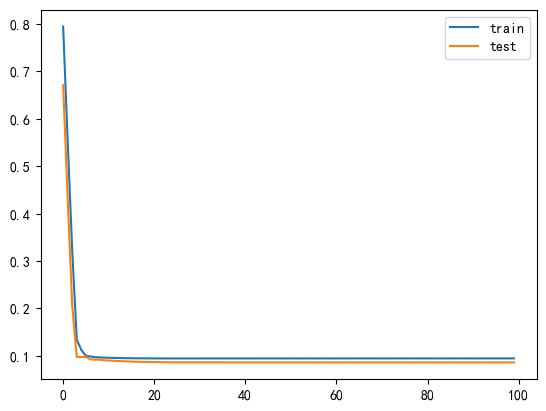

In [69]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

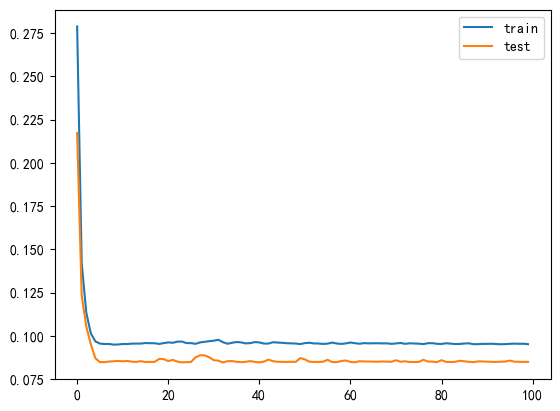

In [75]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [70]:
# make a prediction
yhat = model.predict(x_test)
test_X = x_test.reshape((x_test.shape[0], x_test.shape[-1]))

7/7 [==============================] - 0s 2ms/step


In [52]:
y_pred = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [54]:
y_pred

array([[0.6673604 ],
       [0.66167873],
       [0.62221885],
       [0.5411719 ],
       [0.58662796],
       [0.8022496 ],
       [0.6356333 ],
       [0.7096732 ],
       [0.6964299 ],
       [0.7969616 ],
       [0.5941953 ],
       [0.8020647 ],
       [0.5758369 ],
       [0.5669688 ],
       [0.72341406],
       [0.6262429 ],
       [0.76936865],
       [0.6008464 ],
       [0.73212385],
       [0.43916148],
       [0.6942902 ],
       [0.39806926],
       [0.494629  ],
       [0.73480535],
       [0.75533295],
       [0.42377767],
       [0.6905372 ],
       [0.7381176 ],
       [0.75201106],
       [0.58544064],
       [0.7348701 ],
       [0.66850686],
       [0.7043632 ],
       [0.706707  ],
       [0.59774697],
       [0.5404016 ],
       [0.73917544],
       [0.72358257],
       [0.6052047 ],
       [0.4511386 ],
       [0.6998074 ],
       [0.7803838 ],
       [0.6977188 ],
       [0.71029437],
       [0.57917583],
       [0.6968803 ],
       [0.82992923],
       [0.583

In [55]:
y_test

array([0.6672564 , 0.43907505, 0.616937  , 0.58621156, 0.5777457 ,
       0.94144195, 0.45373356, 0.5148841 , 0.7084201 , 0.9029315 ,
       0.53832453, 0.66245884, 0.63618135, 0.4250754 , 0.700911  ,
       0.327327  , 0.86080986, 0.5606305 , 0.76497287, 0.6352375 ,
       0.7023273 , 0.5322688 , 0.61903226, 0.55342996, 0.80320174,
       0.5697156 , 0.6284507 , 0.7157419 , 0.8562811 , 0.57929236,
       0.6199404 , 0.48709464, 0.6722097 , 0.6952369 , 0.5923965 ,
       0.57571256, 0.7174513 , 0.6684016 , 0.6199581 , 0.557177  ,
       0.8152625 , 0.7811635 , 0.6491594 , 0.7466426 , 0.47123998,
       0.7311544 , 0.8230764 , 0.5898562 , 0.6246311 , 0.61917263,
       0.89042085, 0.8582563 , 0.51041687, 0.6189461 , 0.5859058 ,
       0.64237636, 0.5019923 , 0.4777097 , 0.8457381 , 0.8249331 ,
       0.7674164 , 0.38550383, 0.70380825, 0.87832326, 0.71680766,
       0.6132198 , 0.6361565 , 0.8505462 , 0.6047009 , 0.78133434,
       0.7782372 , 0.96379083, 0.7205068 , 0.9360276 , 0.81883

In [71]:
# calculate MAPE
def mean_absolute_percentage_error(real, predict):
    res = 0
    count = 0
    for i in range(len(real)):
        if real[i] != 0:
            res += abs((predict[i]-real[i])/real[i])
            count += 1
    return res/count

In [72]:
from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y = y_test.reshape((len(y_test), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# calculate MAPE
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
print('Test mape: %.3f' % mape)

Test RMSE: 0.158
Test mape: 0.006
